In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('./data/train.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

x = train.drop(['label'], axis=1)

y = train['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1001)

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [4]:
from sklearn.metrics import accuracy_score, roc_curve
accuracy_score(y_test, y_pred)

0.93988095238095237

In [5]:
y_pred[:10]

array([3, 9, 6, 8, 0, 8, 2, 9, 9, 0])

In [6]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[818,   0,   4,   0,   1,   1,   1,   0,   3,   0],
       [  0, 907,   7,   3,   1,   0,   1,   3,   2,   0],
       [  3,   6, 820,   6,   2,   0,   1,   9,   6,   2],
       [  2,   3,  24, 772,   2,  15,   2,   4,  15,   6],
       [  3,   3,   0,   1, 769,   1,   7,   3,   2,  19],
       [  8,   5,   1,  24,   6, 722,  14,   1,   8,   5],
       [ 10,   3,   2,   2,   3,   4, 768,   0,   4,   0],
       [  2,   4,  26,   5,   8,   0,   0, 847,   2,  16],
       [  5,   9,  15,  29,   7,  13,   6,   2, 731,  15],
       [  3,   1,   6,  18,  18,   1,   0,  11,   9, 741]])

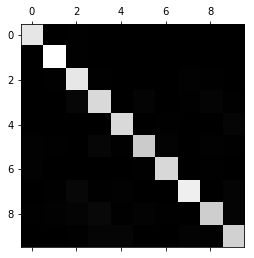

In [7]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

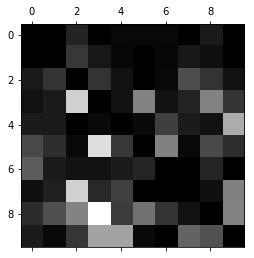

In [8]:
row_sums = cfm.sum(axis=1, keepdims=True)
norm_conf_mx = cfm / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(model, x_train, y_train, cv=3,
                                    method="predict_proba")

y_probas_forest

array([[ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  1. ],
       [ 0.1,  0. ,  0.7, ...,  0. ,  0. ,  0.1],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [10]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

NameError: name 'fpr' is not defined

In [11]:
test = pd.read_csv('./data/test.csv')

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
test_pred = model.predict(test)

In [13]:
sub = pd.DataFrame({'Label': test_pred})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,0,4
4,2,5


In [15]:
sub.to_csv('./data/sub.csv', index=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_pred = knn.predict(test)

In [ ]:
sub = pd.DataFrame({'Label': knn_pred})

sub['ImageId'] = sub.index + 1

sub.head()

In [ ]:
sub.to_csv('./data/sub.csv', index=False)

# Todo

1. [ ] Preproccess the training data by shifting all entries up, left, down, right by 1px 
2. [ ] Find the best params for knn 

In [14]:
x_mat = np.asmatrix(x)

y_arr = np.array(y)

x_mat.shape

(42000, 784)

In [15]:
x_mat = train.iloc[:,1:].values.reshape(-1,28,28,1)
    
x_mat.shape


(42000, 28, 28, 1)

In [16]:
import keras.preprocessing.image

## augment data

# generate new images via rotations, translations, zoom using keras
def generate_images(imgs):
    
    # rotations, translations, zoom
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        zoom_range = 0.1)

    # get transformed images
    imgs = image_generator.flow(imgs.copy(), np.zeros(len(imgs)),
                                batch_size=len(imgs), shuffle = False).next()    
  
    return imgs[0]

Using TensorFlow backend.


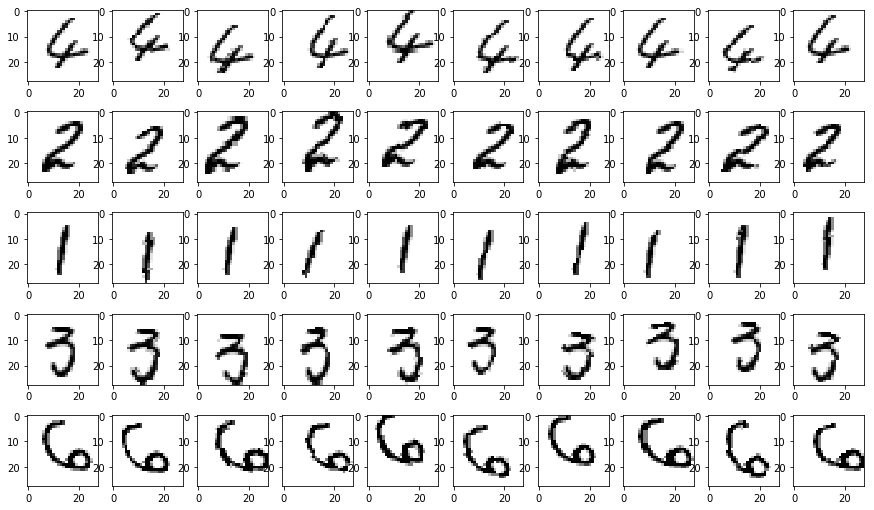

In [17]:
fig,axs = plt.subplots(5,10, figsize=(15,9))
for i in range(5):
    n = np.random.randint(0,x_mat.shape[0]-2)
    axs[i,0].imshow(x_mat[n:n+1].reshape(28,28),cmap=cm.binary)
    axs[i,1].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,2].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,3].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,4].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,5].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,6].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,7].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,8].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)
    axs[i,9].imshow(generate_images(x_mat[n:n+1]).reshape(28,28), cmap=cm.binary)

1

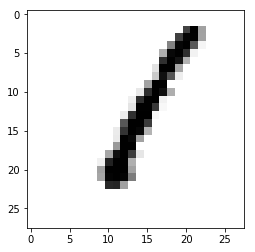

In [18]:
generate_images(x_mat[0:1])[0]
plt.imshow(generate_images(x_mat[0:2])[0].reshape(28,28), cmap=cm.binary)
y_arr[0]

In [35]:
# x_gen = generate_images(x_mat)
# x_gen1 = generate_images(x_mat)
# x_gen2 = generate_images(x_mat)
# x_gen3 = generate_images(x_mat)
# x_gen4 = generate_images(x_mat)
# x_gen5 = generate_images(x_mat)
# x_gen6 = generate_images(x_mat)
# x_gen7 = generate_images(x_mat)
# x_gen8 = generate_images(x_mat)

x_all = np.repeat(generate_images(x_mat), 9, axis=0)
y_all = np.repeat(y, 9)


print(x_all.shape)
print(y_all.shape)

(168000, 28, 28, 1)
(168000,)


## Keras


In [36]:
x_float = np.divide(x_all, 255.0)

X_train, X_test, y_train, y_test = train_test_split(x_float, y_all, test_size=.25, random_state=1001)

In [37]:
X_test.shape

(42000, 28, 28, 1)

In [38]:
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = (28, 28, 1)
num_classes = 10
batch_size = 128
epochs = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [39]:
y_train.shape

(126000, 10)

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 126000 samples, validate on 42000 samples
Epoch 1/10
126000/126000 [==============================] - 132s - loss: 0.4314 - acc: 0.8643 - val_loss: 0.1125 - val_acc: 0.9658
Epoch 2/10
126000/126000 [==============================] - 130s - loss: 0.1633 - acc: 0.9502 - val_loss: 0.0700 - val_acc: 0.9780
Epoch 3/10
111360/126000 [=========================>....] - ETA: 14s - loss: 0.1244 - acc: 0.9626

In [28]:
test = pd.read_csv('./data/test.csv')

x_test = test.values.astype('float32')

X_test = x_test.reshape(x_test.shape[0], 28, 28,1)


In [29]:
x_float = np.divide(X_test, 255.0)

In [30]:
preds = model.predict_classes(x_float)

preds

27808/28000 [============================>.] - ETA: 0s

array([2, 0, 9, ..., 3, 9, 2])

In [33]:
sub = pd.DataFrame({'Label': preds})

sub['ImageId'] = sub.index + 1

sub.head()

,Label,ImageId
0,2,1
1,0,2
2,9,3
3,0,4
4,3,5


In [34]:
sub.to_csv('./data/sub.csv', index=False)